## Preamble-y stuff

In [2]:
source("R/functions.R")

In [28]:
install.packages("gdtools")
# install.packages(c("fontcm", "extrafont", "data.table", "plyr", "ggplot2", "ggrepel", "ggthemes", "scales", "svglite", "tikzDevice"))

Warning message in install.packages("gdtools"):
“installation of package ‘gdtools’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [8]:
# libraries
library(fontcm)
library(extrafont)
# loadfonts(device = "pdf", quiet = TRUE)
# loadfonts(device = "postscript", quiet = TRUE)
# font_install("fontcm")
library(data.table)
library(plyr)
library(ggplot2)
library(ggrepel)
library(ggthemes)
library(scales)
library(svglite)
library(tikzDevice)

ERROR: Error in library(svglite): there is no package called ‘svglite’


In [9]:
ps.options(family = "CM Roman", fonts = "cmr10")

## Load and clean up All The Things

### Load GULP data

In [25]:
# Analyse data output by general_info.pl script
nat_gulp <- read.csv("data/base/nat_ambient_gulp.csv", header = TRUE, sep = "", quote = "\"", dec = ".")
sco_gulp <- read.csv("data/base/scol_ambient_gulp.csv", header = TRUE, sep = "", quote = "\"", dec = ".")
mes_gulp <- read.csv("data/base/mes_ambient_gulp.csv", header = TRUE, sep = "", quote = "\"", dec = ".")
lau_ambient <- read.csv("data/base/lau_ambient_gulp.csv", header = TRUE, sep = "", quote = "\"", dec = ".")
leo_ambient <- read.csv("data/base/leo_ambient_gulp.csv", header = TRUE, sep = "", quote = "\"", dec = ".")

# Grab the original (computational) data for natrolite and scolecite in GULP
nat_gulp_orig <- read.csv("data/base/nat_orig_gulp.csv", header = TRUE, sep = "", quote = "\"", dec = ".")
sco_gulp_orig <- read.csv("data/base/scol_orig_gulp.csv", header = TRUE, sep = "", quote = "\"", dec = ".")

# Grab the experimental data for them all as much as possible please
# thermo_expt <- read.csv("data/base/expt_thermo.csv", header = TRUE, sep = ",", quote = "\"", dec = ".")

# Grab energies only for GULP investigations
nat_gulp_ene <- read.csv("data/base/nat_energies_gulp.csv", header = FALSE, sep = "", quote = "\"", dec = ".")
sco_gulp_ene <- read.csv("data/base/scol_energies_gulp.csv", header = FALSE, sep = "", quote = "\"", dec = ".")
mes_gulp_ene <- read.csv("data/base/mes_energies_gulp.csv", header = FALSE, sep = "", quote = "\"", dec = ".")

# Grab water stuff
water_stuff <- read.csv("data/base/water_gulp.csv", header = TRUE, sep = ",", quote = "\"", dec = ".")

### Clean up GULP data

In [11]:
# Sort out column-naming faffs
nat_gulp <- geninfo.convert(nat_gulp)
sco_gulp <- geninfo.convert(sco_gulp)
mes_gulp <- geninfo.convert(mes_gulp)
lau_ambient <- geninfo.convert(lau_ambient)
leo_ambient <- geninfo.convert(leo_ambient)
nat_gulp_orig <- geninfo.convert(nat_gulp_orig)
sco_gulp_orig <- geninfo.convert(sco_gulp_orig)

# Sort out adding and shuffling of columns
# Adding...
nat_gulp <- column.add(nat_gulp)
sco_gulp <- column.add(sco_gulp)
mes_gulp <- column.add(mes_gulp)
lau_ambient <- column.add(lau_ambient)
leo_ambient <- column.add(leo_ambient)
nat_gulp_orig <- column.add(nat_gulp_orig)
sco_gulp_orig <- column.add(sco_gulp_orig)
# Shuffling...
nat_gulp <- column.shuffle(nat_gulp)
sco_gulp <- column.shuffle(sco_gulp)
mes_gulp <- column.shuffle(mes_gulp)
lau_ambient <- column.shuffle(lau_ambient)
leo_ambient <- column.shuffle(leo_ambient)
nat_gulp_orig <- column.shuffle(nat_gulp_orig)
sco_gulp_orig <- column.shuffle(sco_gulp_orig)

### Get $\Delta H$s for GULP data

In [26]:
# Calculate current delta-H values and add zero as first value
nat_gulp_ene_deltas <- cbind(1:(nrow(nat_gulp)-1), (16-(0:(nrow(nat_gulp)-2))), (diff(nat_gulp$ene_kj, lag = 1, differences = 1) - water_stuff[3,2]))
#nat_gulp_ene_pcdeltas <- cbind(1:(nrow(nat_gulp)-1), (16-(0:(nrow(nat_gulp)-2))), (diff((((nat_gulp$ene_kj - water_stuff[3,2])/nat_gulp[1,5]) * -100), lag = 1, differences = 1)))
sco_gulp_ene_deltas <- cbind(1:(nrow(sco_gulp)-1), (24-(0:(nrow(sco_gulp)-2))), (diff(sco_gulp$ene_kj, lag = 1, differences = 1) - water_stuff[3,2]))
mes_gulp_ene_deltas <- cbind(1:(nrow(mes_gulp)-1), (64-(0:(nrow(mes_gulp)-2))), (diff(mes_gulp$ene_kj, lag = 1, differences = 1) - water_stuff[3,2]))

# Tabulate first investigation's deltas
# NB: The original fully-hydrated one isn't included in the first investigation's data files for some reason, ditto for fully-dehydrated
nat_gulp_orig_deltas <- cbind(1:(nrow(nat_gulp_orig)-1), (16-(0:(nrow(nat_gulp_orig)-2))), (diff(nat_gulp_orig$ene_kj, lag = 1, differences = 1) - water_stuff[3,2]))
sco_gulp_orig_deltas <- cbind(1:(nrow(sco_gulp_orig)-1), (24-(0:(nrow(sco_gulp_orig)-2))), (diff(sco_gulp_orig$ene_kj, lag = 1, differences = 1) - water_stuff[3,2]))

# Averages for deltas (GULP)
nat_gulp_ene_deltas_avg <- mean(nat_gulp_ene_deltas[1:16,3])
sco_gulp_ene_deltas_avg <- mean(sco_gulp_ene_deltas[1:24,3])
sco_gulp_ene_deltas_stage1_avg <- mean(sco_gulp_ene_deltas[9:24,3])
sco_gulp_ene_deltas_stage2_avg <- mean(sco_gulp_ene_deltas[1:8,3])
mes_gulp_ene_deltas_avg <- mean(mes_gulp_ene_deltas[1:64,3])
mes_gulp_ene_deltas_stage1_avg <- mean(mes_gulp_ene_deltas[32:63,3])
mes_gulp_ene_deltas_stage2_avg <- mean(mes_gulp_ene_deltas[1:31,3])

ERROR: Error in nat_gulp_ene_deltas[1:16, 3]: subscript out of bounds


### Get $\Delta V$s for GULP data

In [13]:
# Volumes themselves for GULP stuffs
nat_gulp_vols <- cbind(0:(nrow(nat_gulp)-1), (16-(0:(nrow(nat_gulp)-1))), nat_gulp$vol)
nat_gulp_vols_fractional <- cbind(0:(nrow(nat_gulp)-1), (16-(0:(nrow(nat_gulp)-1))), nat_gulp$vol/nat_gulp[1,13])

# Volume changes for GULP stuffs
nat_gulp_vol_deltas <- cbind(1:(nrow(nat_gulp)-1), (16-(0:(nrow(nat_gulp)-2))), (diff(nat_gulp$vol, lag = 1, differences = 1)))
sco_gulp_vol_deltas <- cbind(1:(nrow(sco_gulp)-1), (24-(0:(nrow(sco_gulp)-2))), (diff(sco_gulp$vol, lag = 1, differences = 1)))
mes_gulp_vol_deltas <- cbind(1:(nrow(mes_gulp)-1), (64-(0:(nrow(mes_gulp)-2))), (diff(mes_gulp$vol, lag = 1, differences = 1)))

### Get $\Delta \{a, b, c\}$s for GULP data

In [14]:
# Cell parameter changes for GULP stuffs
nat_gulp_a <- cbind(1:(nrow(nat_gulp)), (16-(0:(nrow(nat_gulp)-1))), nat_gulp$a)
nat_gulp_b <- cbind(1:(nrow(nat_gulp)), (16-(0:(nrow(nat_gulp)-1))), nat_gulp$b)
nat_gulp_c <- cbind(1:(nrow(nat_gulp)), (16-(0:(nrow(nat_gulp)-1))), nat_gulp$c)

# Cell parameter changes for GULP stuffs
nat_gulp_abc_deltas <- cbind(1:(nrow(nat_gulp)-1), (16-(0:(nrow(nat_gulp)-2))), (diff(nat_gulp$a, lag = 1, differences = 1)))
nat_gulp_abc_deltas <- cbind(1:(nrow(nat_gulp)-1), (16-(0:(nrow(nat_gulp)-2))), (diff(nat_gulp$b, lag = 1, differences = 1)))
nat_gulp_abc_deltas <- cbind(1:(nrow(nat_gulp)-1), (16-(0:(nrow(nat_gulp)-2))), (diff(nat_gulp$c, lag = 1, differences = 1)))

sco_gulp_abc_deltas <- cbind(1:(nrow(sco_gulp)-1), (24-(0:(nrow(sco_gulp)-2))), (diff(sco_gulp$a, lag = 1, differences = 1)))
sco_gulp_abc_deltas <- cbind(1:(nrow(sco_gulp)-1), (24-(0:(nrow(sco_gulp)-2))), (diff(sco_gulp$b, lag = 1, differences = 1)))
sco_gulp_abc_deltas <- cbind(1:(nrow(sco_gulp)-1), (24-(0:(nrow(sco_gulp)-2))), (diff(sco_gulp$c, lag = 1, differences = 1)))

mes_gulp_abc_deltas <- cbind(1:(nrow(mes_gulp)-1), (64-(0:(nrow(mes_gulp)-2))), (diff(mes_gulp$a, lag = 1, differences = 1)))
mes_gulp_abc_deltas <- cbind(1:(nrow(mes_gulp)-1), (64-(0:(nrow(mes_gulp)-2))), (diff(mes_gulp$b, lag = 1, differences = 1)))
mes_gulp_abc_deltas <- cbind(1:(nrow(mes_gulp)-1), (64-(0:(nrow(mes_gulp)-2))), (diff(mes_gulp$c, lag = 1, differences = 1)))

### Load CP2K data

In [15]:
# Grab energies for CP2K investigations
nat_cp2k_ene <- read.csv("data/base/nat_cp2k_gs.csv", header = FALSE, sep = "", quote = "\"", dec = ".")

# Grab volumes for CP2K investigations
nat_cp2k_vol <- read.csv("../nat_cp2k_mincellvol.ssv", header = FALSE, sep = "", quote = "\"", dec = ".")
nat_cp2k_vol_test <- read.csv("data/base/nat_cp2k_vol.ssv", header = TRUE, sep = "", quote = "\"", dec = ".")

### Clean up CP2K data

In [16]:
# Sort out column-naming faffs
nat_cp2k_vol <- cp2k.volheads(nat_cp2k_vol)
nat_cp2k_ene <- cp2k.eneheads(nat_cp2k_ene)

# Sort out adding and shuffling of columns
nat_cp2k_vol <- cp2k.vol.column.faff(nat_cp2k_vol)
nat_cp2k_ene <- cp2k.ene.column.faff(nat_cp2k_ene)

### Get $\Delta H$s for CP2K data

In [17]:
# Energy changes for CP2K stuffs
nat_cp2k_ene_deltas <- cbind(1:(nrow(nat_cp2k_ene)-1), (15-(0:(nrow(nat_cp2k_ene)-2))), (diff(nat_cp2k_ene$ene_kj, lag = 1, differences = 1) - water_stuff[3,2]))
#nat_cp2k_ene_pcdeltas <- cbind(1:(nrow(nat_cp2k_ene)-1), (15-(0:(nrow(nat_cp2k_ene)-2))), (diff((((nat_cp2k_ene$ene_kj - water_stuff[3,2])/nat_cp2k_ene[1,5]) * -100), lag = 1, differences = 1)))

ERROR: Error in cbind(1:(nrow(nat_cp2k_ene) - 1), (15 - (0:(nrow(nat_cp2k_ene) - : object 'water_stuff' not found


### Get $\Delta V$s for CP2K data

In [18]:
# Volumes themselves for CP2K stuffs
#nat_cp2k_vols <- cbind(1:(nrow(nat_cp2k_ene)), (16-(0:(nrow(nat_cp2k_ene)-1))), nat_cp2k_vol$vol)
nat_cp2k_vols <- read.csv("data/base/nat_cp2k_vol.ssv", header = TRUE, sep = "", quote = "\"", dec = ".")
nat_cp2k_vols_fractional <- cbind(0:(nrow(nat_cp2k_vols)-1), (16-(0:(nrow(nat_cp2k_vols)-1))), nat_cp2k_vols[4]/nat_gulp[1,13])

# Volume changes for CP2K stuffs
nat_cp2k_vol_deltas <- cbind(1:(nrow(nat_cp2k_vol)-1), (15-(0:(nrow(nat_cp2k_vol)-2))), (diff(nat_cp2k_vol$vol, lag = 1, differences = 1)))

### Get $\Delta \{a, b, c\}$s for CP2K data

In [19]:
# Cell parameters themselves for CP2K stuffs
nat_cp2k_a <- cbind(1:(nrow(nat_cp2k_vol)), (16-(0:(nrow(nat_cp2k_vol)-1))), nat_cp2k_vol$a)
nat_cp2k_b <- cbind(1:(nrow(nat_cp2k_vol)), (16-(0:(nrow(nat_cp2k_vol)-1))), nat_cp2k_vol$b)
nat_cp2k_c <- cbind(1:(nrow(nat_cp2k_vol)), (16-(0:(nrow(nat_cp2k_vol)-1))), nat_cp2k_vol$c)

# Cell parameter changes for CP2K stuffs
nat_cp2k_abc_deltas <- cbind(1:(nrow(nat_cp2k_vol)-1), (15-(0:(nrow(nat_cp2k_vol)-2))), (diff(nat_cp2k_vol$a, lag = 1, differences = 1)))
nat_cp2k_abc_deltas <- cbind(1:(nrow(nat_cp2k_vol)-1), (15-(0:(nrow(nat_cp2k_vol)-2))), (diff(nat_cp2k_vol$b, lag = 1, differences = 1)))
nat_cp2k_abc_deltas <- cbind(1:(nrow(nat_cp2k_vol)-1), (15-(0:(nrow(nat_cp2k_vol)-2))), (diff(nat_cp2k_vol$c, lag = 1, differences = 1)))

## Set up plots

In [20]:
fontplease = "CM Roman" # For macOS
# fontplease = "cmr10" # For Linux

### GULP data

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'nat_gulp_ene_deltas' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplot_build.ggplot

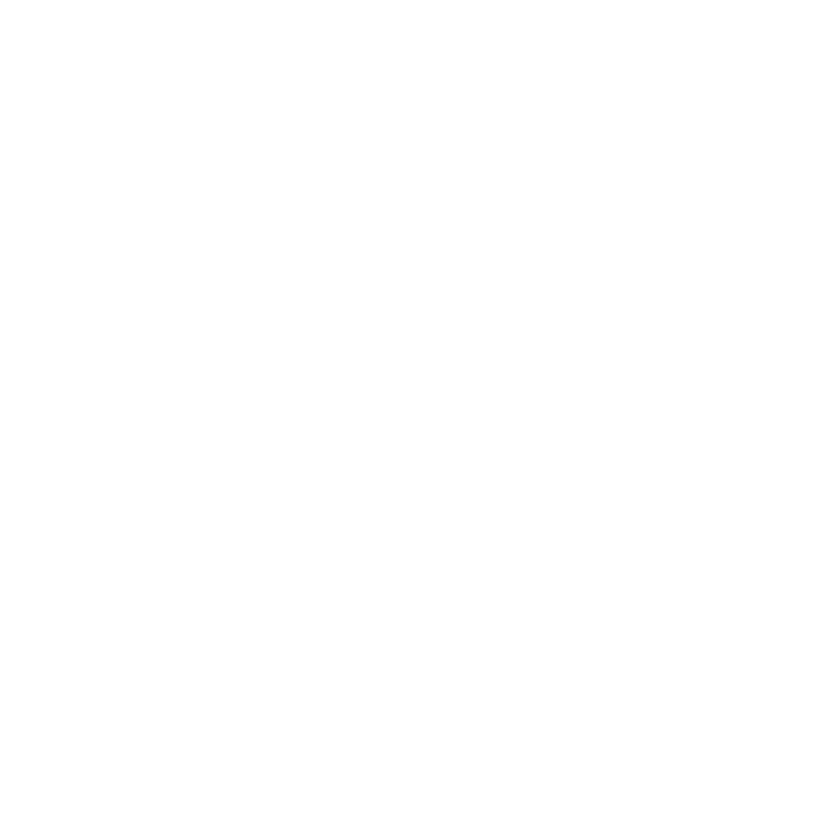

In [21]:
# Plot delta-H against dehydration step for natrolite family all together
fig.diffs <- function() {
    ggplot() +
        geom_line(aes(x = nat_gulp_ene_deltas[1:16,2], y = nat_gulp_ene_deltas[1:16,3])) +
        geom_point(aes(x = nat_gulp_ene_deltas[1:16,2], y = nat_gulp_ene_deltas[1:16,3])) +
        geom_line(aes(x = sco_gulp_ene_deltas[1:24,2], y = sco_gulp_ene_deltas[1:24,3]), linetype = "dashed", colour = "blue") +
        geom_point(aes(x = sco_gulp_ene_deltas[1:24,2], y = sco_gulp_ene_deltas[1:24,3]), shape = 15, colour = "blue") +
        geom_line(aes(x = mes_gulp_ene_deltas[1:63,2], y = mes_gulp_ene_deltas[1:63,3]), colour = "darkgreen") +
        geom_point(aes(x = mes_gulp_ene_deltas[1:63,2], y = mes_gulp_ene_deltas[1:63,3]), shape = 17, colour = "darkgreen") +
        xlab(expression(n^th~water~molecule~lost)) +
        ylab(expression(paste("$\\Delta$")*H[dehyd]/kJmol^-1)) +
        #ggtitle("Energy vs. number of water molecules lost") +
        theme_minimal() +
        theme(text = element_text(size = 10))
}
fig.diffs()

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'nat_gulp_ene_deltas' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplot_build.ggplot

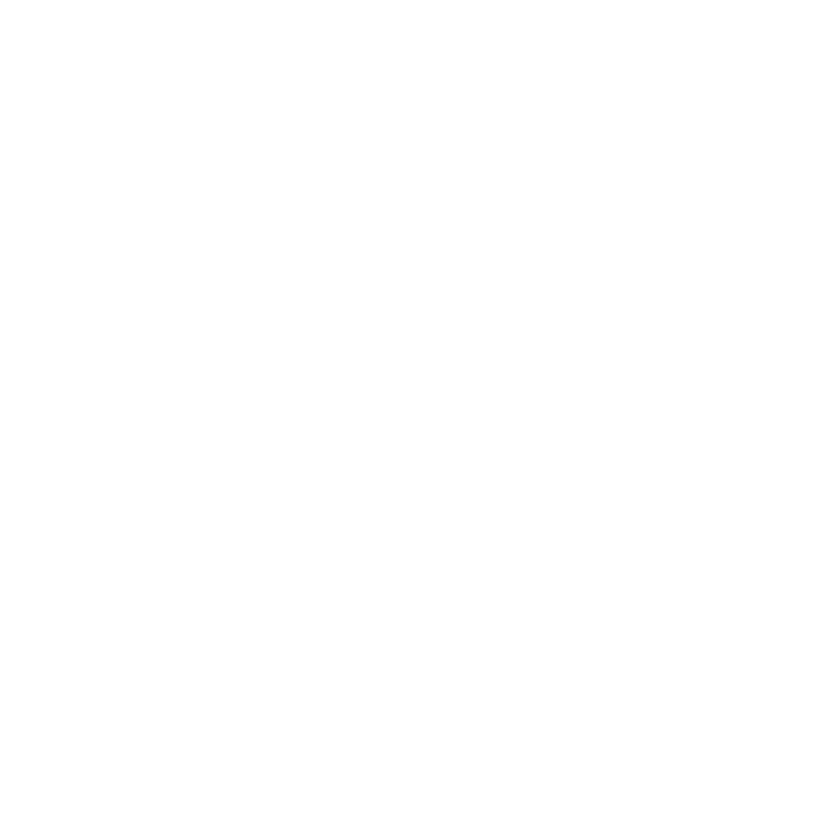

In [22]:
# Plot delta-H against dehydration step for natrolite and scolecite together
# (with average-y lines plotted first to be more background-y!)
fig.diffs.nat.sco <- function() {
    ggplot() +
        stat_smooth(aes(x = nat_gulp_ene_deltas[1:16,2], y = nat_gulp_ene_deltas[1:16,3]), geom = "line", colour = "black", alpha = 0.5, method = lm, se = FALSE, fullrange = TRUE) +
        geom_line(aes(x = nat_gulp_ene_deltas[1:16,2], y = nat_gulp_ene_deltas[1:16,3])) +
        geom_point(aes(x = nat_gulp_ene_deltas[1:16,2], y = nat_gulp_ene_deltas[1:16,3])) +
        stat_smooth(aes(x = sco_gulp_ene_deltas[1:8,2], y = sco_gulp_ene_deltas[1:8,3]), geom = "line", colour = "lightblue", alpha = 0.75, method = lm, se = FALSE, fullrange = FALSE) +
        stat_smooth(aes(x = sco_gulp_ene_deltas[9:24,2], y = sco_gulp_ene_deltas[9:24,3]), geom = "line", colour = "lightblue", alpha = 0.75, method = lm, se = FALSE, fullrange = FALSE) +
        stat_smooth(aes(x = sco_gulp_ene_deltas[1:24,2], y = sco_gulp_ene_deltas[1:24,3]), geom = "line", colour = "blue", alpha = 0.5, method = lm, se = FALSE, fullrange = TRUE) +
        geom_line(aes(x = sco_gulp_ene_deltas[1:24,2], y = sco_gulp_ene_deltas[1:24,3]), linetype = "dashed", colour = "blue") +
        geom_point(aes(x = sco_gulp_ene_deltas[1:24,2], y = sco_gulp_ene_deltas[1:24,3]), shape = 15, colour = "blue") +
        xlab(expression(n^th~water~molecule~lost)) +
        ylab(expression(paste("$\\Delta$")*H[dehyd]/kJmol^-1)) +
        #ggtitle("Energy vs. number of water molecules lost") +
        theme_minimal() +
        theme(text = element_text(size = 10))
}
fig.diffs.nat.sco()

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'nat_gulp_ene_deltas' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplot_build.ggplot

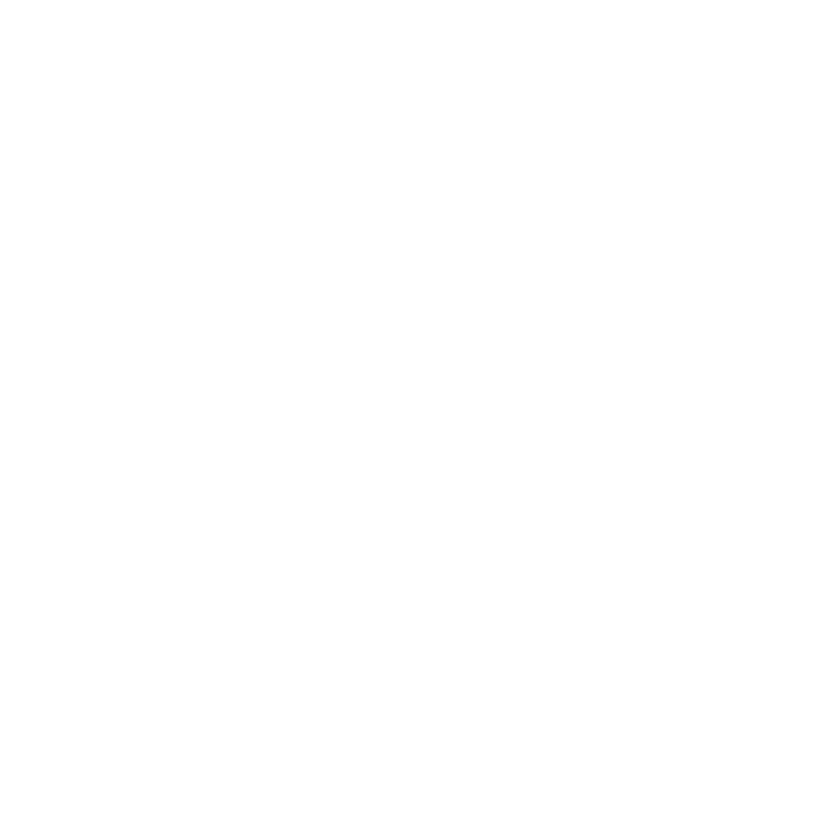

In [23]:
# Plot delta-H against dehydration step for natrolite on its own
fig.diffs.nat <- function() {
    ggplot() +
        geom_line(aes(x = nat_gulp_ene_deltas[1:16,2], y = nat_gulp_ene_deltas[1:16,3])) +
        geom_point(aes(x = nat_gulp_ene_deltas[1:16,2], y = nat_gulp_ene_deltas[1:16,3])) +
        xlab(expression(n^th~water~molecule~lost)) +
        ylab(expression(paste("$\\Delta$")*H[dehyd]/kJmol^-1)) +
        #ggtitle("Energy vs. number of water molecules lost") +
        theme_minimal() +
        theme(text = element_text(size = 10))
}
fig.diffs.nat()

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'sco_gulp_ene_deltas' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplot_build.ggplot

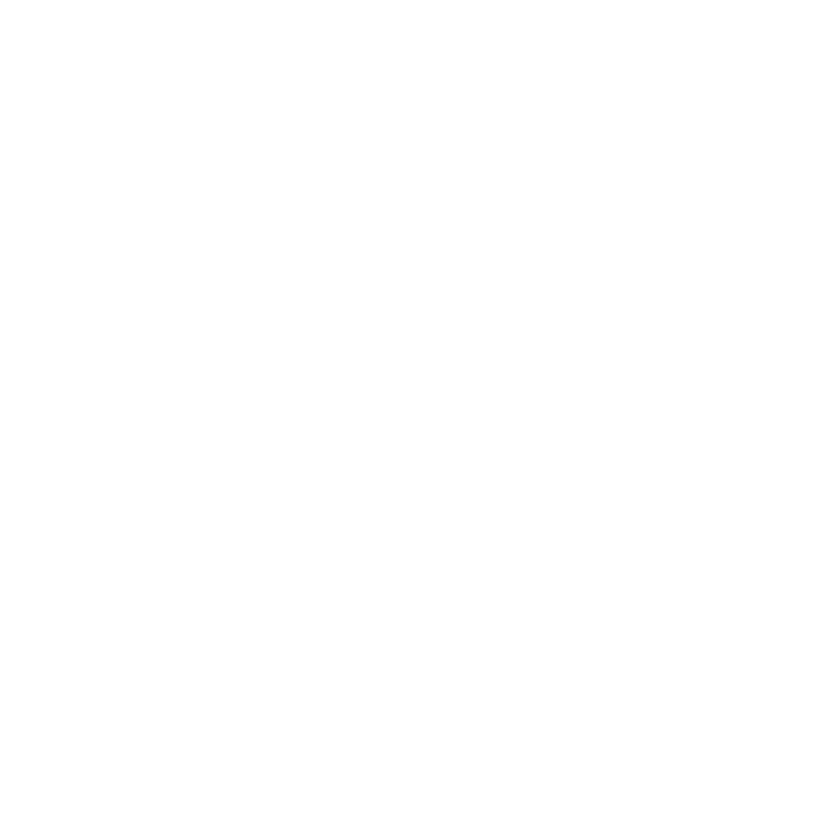

In [24]:
# Plot delta-H against dehydration step for scolecite on its own
fig.diffs.sco <- function() {
    ggplot() +
        geom_line(aes(x = sco_gulp_ene_deltas[1:24,2], y = sco_gulp_ene_deltas[1:24,3]), linetype = "dashed", color = "blue") +
        geom_point(aes(x = sco_gulp_ene_deltas[1:24,2], y = sco_gulp_ene_deltas[1:24,3]), shape = 15, color = "blue") +
        xlab(expression(n^th~water~molecule~lost)) +
        ylab(expression(paste("$\\Delta$")*H[dehyd]/kJmol^-1)) +
        #ggtitle("Energy vs. number of water molecules lost") +
        theme_minimal() +
        theme(text = element_text(size = 10))
}
fig.diffs.sco()

In [ ]:
# Plot delta-H against dehydration step for mesolite on its own
fig.diffs.mes <- function() {
    ggplot() +
        geom_line(aes(x = mes_gulp_ene_deltas[1:63,2], y = mes_gulp_ene_deltas[1:63,3]), color = "darkgreen") +
        geom_point(aes(x = mes_gulp_ene_deltas[1:63,2], y = mes_gulp_ene_deltas[1:63,3]), shape = 17, color = "darkgreen") +
        xlab(expression(n^th~water~molecule~lost)) +
        ylab(expression(paste("$\\Delta$")*H[dehyd]/kJmol^-1)) +
        #ggtitle("Energy vs. number of water molecules lost") +
        theme_minimal() +
        theme(text = element_text(size = 10))
}
fig.diffs.mes()

### Comparisons of GULP and CP2K data

In [ ]:
# Plot delta-H against dehydration step for natrolite in GULP and CP2K together
# fig.diffs.nat.ene.comp <- function() {
#     ggplot() +
#         geom_line(aes(x = nat_gulp_ene_pcdeltas[1:16,2], y = nat_gulp_ene_pcdeltas[1:16,3]), linetype = "dashed") +
#         geom_point(aes(x = nat_gulp_ene_pcdeltas[1:16,2], y = nat_gulp_ene_pcdeltas[1:16,3]), shape = 15) +
#         geom_line(aes(x = nat_cp2k_ene_pcdeltas[1:15,2], y = nat_cp2k_ene_pcdeltas[1:15,3])) +
#         geom_point(aes(x = nat_cp2k_ene_pcdeltas[1:15,2], y = nat_cp2k_ene_pcdeltas[1:15,3])) +
#         xlab(expression(n^th~water~molecule~lost)) +
#         ylab(expression(Delta*H[dehyd]/kJmol^-1)) +
#         #ggtitle("Energy vs. number of water molecules lost") +
#         theme_minimal() +
#         theme(text = element_text(size = 10))
# }
# fig.diffs.nat.ene.comp()

In [ ]:
# Plot delta-vol against dehydration step for natrolite in GULP and CP2K together
# fig.diffs.nat.vol.comp <- function() {
#     ggplot() +
#         geom_line(aes(x = nat_gulp_vol_deltas[1:16,2], y = nat_gulp_vol_deltas[1:16,3]), linetype = "dashed") +
#         geom_point(aes(x = nat_gulp_vol_deltas[1:16,2], y = nat_gulp_vol_deltas[1:16,3]), shape = 15) +
#         geom_line(aes(x = nat_cp2k_vol_deltas[1:15,2], y = nat_cp2k_vol_deltas[1:15,3])) +
#         geom_point(aes(x = nat_cp2k_vol_deltas[1:15,2], y = nat_cp2k_vol_deltas[1:15,3])) +
#         xlab(expression(n^th~water~molecule~lost)) +
#         ylab(expression(Delta*Vol/kJmol^-1)) +
#         #ggtitle("Energy vs. number of water molecules lost") +
#         theme_minimal() +
#         theme(text = element_text(size = 10))
# }
# fig.diffs.nat.vol.comp()

In [ ]:
# Plot volumes against dehydration step for natrolite in GULP and CP2K together
# fig.nat.vol.comp <- function() {
#     ggplot() +
#         geom_line(aes(x = nat_gulp_vols[1:16,1], y = nat_gulp_vols[1:16,3])) +
#         geom_point(aes(x = nat_gulp_vols[1:16,1], y = nat_gulp_vols[1:16,3]), shape = 15) +
#         geom_line(aes(x = nat_cp2k_vols[1:16,1], y = nat_cp2k_vols[1:16,3]), linetype = "dashed") +
#         geom_point(aes(x = nat_cp2k_vols[1:16,1], y = nat_cp2k_vols[1:16,3])) +
#         xlab(expression(n^th~water~molecule~lost)) +
#         ylab(expression(Unit~cell~volume/phantom()*paste("\\r{A}", "", phantom()^{paste("3")}, ""))) +
#         #ggtitle("Volume vs. number of water molecules lost") +
#         theme_minimal() +
#         theme(text = element_text(size = 10))
# }
# fig.nat.vol.comp()

In [ ]:
fig.nat.vol.comp <- function() {
    ggplot() +
        geom_line(aes(x = nat_gulp_vols_fractional[1:16,1], y = nat_gulp_vols_fractional[1:16,3]), colour = "grey") +
        geom_point(aes(x = nat_gulp_vols_fractional[1:16,1], y = nat_gulp_vols_fractional[1:16,3]), colour = "grey") +
        geom_line(aes(x = nat_cp2k_vols_fractional[1:16,1], y = nat_cp2k_vols_fractional[1:16,3])) +
        geom_point(aes(x = nat_cp2k_vols_fractional[1:16,1], y = nat_cp2k_vols_fractional[1:16,3]), shape = 15) +
        # Joswig 1995 in GULP
        geom_point(aes(x = 16, y = 2074.490711/nat_gulp[1,13]), color = "green") +
        geom_text(aes(x = 16, y = 2074.490711/nat_gulp[1,13], label = "Joswig (1995) structure (GULP)"), check_overlap = TRUE, hjust = 1, nudge_x = -0.1, vjust = 1, nudge_y = -0.01, color = "darkgreen") +
        # Baur 1996 in GULP
        geom_point(aes(x = 16, y = 2074.477262/nat_gulp[1,13]), shape = 1, color = "blue") +
        geom_text(aes(x = 16, y = 2074.477262/nat_gulp[1,13], label = "Baur (1996) structure (GULP)"), check_overlap = TRUE, hjust = 1, nudge_x = -0.5, vjust = 0, nudge_y = -0.005, color = "blue") +
        # Deleted waters from hydrated natrolite in GULP
        geom_point(aes(x = 16, y = 2097.158039/nat_gulp[1,13]), shape = 1, color = "red") +
        geom_text(aes(x = 16, y = 2097.158039/nat_gulp[1,13], label = "Deleted-water structure (GULP)"), check_overlap = TRUE, hjust = 1, nudge_x = -1.75, vjust = 0, nudge_y = -0.0025, color = "red") +
        # Joswig 1995 in CP2K
        geom_point(aes(x = 16, y = 1796.527935/nat_gulp[1,13]), color = "green") +
        geom_text(aes(x = 16, y = 1796.527935/nat_gulp[1,13], label = "Joswig (1995) structure (CP2K)"), check_overlap = TRUE, hjust = 1, nudge_x = -0.5, vjust = 1, nudge_y = -0.0025, color = "darkgreen") +
        # Baur 1996 in CP2K
        geom_point(aes(x = 16, y = 1799.527843/nat_gulp[1,13]), shape = 1, color = "blue") +
        geom_text(aes(x = 16, y = 1799.527843/nat_gulp[1,13], label = "Baur (1996) structure (CP2K)"), check_overlap = TRUE, hjust = 1, nudge_x = -0.5, vjust = 0, nudge_y = 0.0025, color = "blue") +
        xlab(expression(n^th~water~molecule~lost)) +
        ylab(expression(paste(over(Unit~cell~volume, Fully-hydrated~unit~cell~volume)))) +
        #ggtitle("Volume vs. number of water molecules lost") +
        theme_minimal() +
        theme(text = element_text(size = 10))
}
fig.nat.vol.comp()

## Actually plot plots

### GULP data

In [ ]:
tikz(file = "output/figs/fig_diffs.tex", width = 6, height = 4)
fig.diffs()
dev.off()

In [ ]:
tikz(file = "output/figs/fig_diffs_nat_sco.tex", width = 6, height = 4)
fig.diffs.nat.sco()
dev.off()

In [ ]:
tikz(file = "output/figs/fig_diffs_nat.tex", width = 6, height = 4)
fig.diffs.nat()
dev.off()

In [ ]:
tikz(file = "output/figs/fig_diffs_sco.tex", width = 6, height = 4)
fig.diffs.sco()
dev.off()

In [ ]:
tikz(file = "output/figs/fig_diffs_mes.tex", width = 6, height = 4)
fig.diffs.mes()
dev.off()

In [ ]:
# tikz(file = "output/figs/pair_potential_curve.tex", width = 6, height = 4)
# fig.ppc()
# dev.off()

### Comparisons of GULP and CP2K data

In [ ]:
# tikz(file = "output/figs/fig_diffs_natene.tex", width = 6, height = 4)
# fig.diffs.nat.ene.comp()
# dev.off()

In [ ]:
tikz(file = "output/figs/fig_comp_natvol.tex", width = 6, height = 4, engine = "pdftex")
fig.nat.vol.comp()
dev.off()

In [ ]:
nat_gulp_vols_fractional

In [38]:
install.packages("tikzDevice")

Warning message in install.packages("tikzDevice"):
“installation of package ‘tikzDevice’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
